In [2]:
# linear algebra and mathematical operations
import numpy as np 

# data processing and manupulation library
import pandas as pd   

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
test_df = pd.read_csv("test.csv")   #pandas read csv function
train_df = pd.read_csv("train.csv") 

In [4]:
#data explotration
train_df.info()  #The training-set has 891 examples and 11 features + the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects.
train_df.head(8)   #first few members 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S

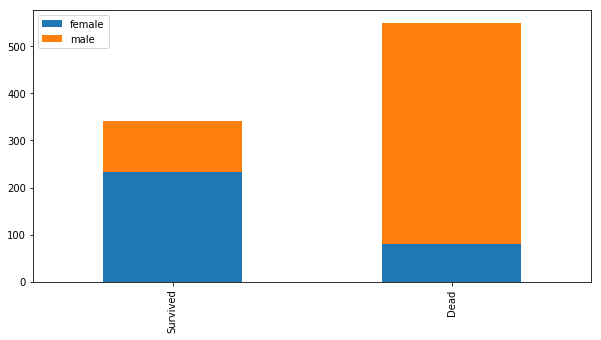

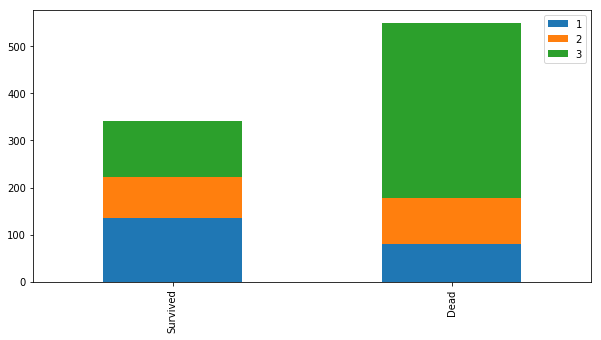

In [5]:
def bar_chart(feature):
    survived = train_df[train_df['Survived']==1][feature].value_counts()
    dead = train_df[train_df['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

bar_chart('Sex')
bar_chart('Pclass')

In [6]:
#data preprocessing
#will drop ‘PassengerId’,'embarked','sibs','parch','ticket','cabin','name' from the train set
#train_df = train_df.drop(['PassengerId','Embarked','SibSp','Parch','Ticket','Cabin','Fare','Name'], axis=1,inplace=True)
train_df = train_df.drop(['PassengerId'], axis=1)
train_df = train_df.drop(['Embarked'], axis=1)
train_df = train_df.drop(['SibSp'], axis=1)
train_df = train_df.drop(['Parch'], axis=1)
train_df = train_df.drop(['Ticket'], axis=1)
train_df = train_df.drop(['Cabin'], axis=1)
train_df = train_df.drop(['Fare'], axis=1)
train_df = train_df.drop(['Name'], axis=1)

#test_df = test_df.drop(['PassengerId','Embarked','SibSp','Parch','Ticket','Cabin','Fare','Name'], axis=1,inplace=True)
#passenger id for test dropped later during data splitting
test_df = test_df.drop(['Embarked'], axis=1)
test_df = test_df.drop(['SibSp'], axis=1)
test_df = test_df.drop(['Parch'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Fare'], axis=1)
test_df = test_df.drop(['Name'], axis=1)


In [7]:
#next we'll have to insert missing values for the field of age
#-0.5 will be used to fill in the missing data 

data = [train_df, test_df]

for dataset in data:
    is_null = dataset["Age"].isnull().sum()
    print(is_null)
    # fill in -0.5 as value for missing data
    rand_age = dataset["Age"].fillna(-0.5)
    # fill NaN values in Age column with -0.5 
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

177
86


In [42]:
#convert sex feature into a numeric forn, as our machine learning algorithms do not do very well will object type attributes.
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [43]:
#CREATING CATEGORIES


In [44]:
#It is important to have a limited number of entries for every attribute,
#from our data we can see that the 'AGE' factor is all over the place
#so categorizing it will make our work more easier and help in increasing the accuracy of the prediction.

data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6
    
#now lets see how its distributed
train_df['Age'].value_counts()

0    245
6    148
4    126
3    106
5    103
2     92
1     71
Name: Age, dtype: int64

In [45]:
#Now our data is complete, cleaned and in process-able form
#we will start out Modelling now
#four models have been considered:-
# 1 - Logistic Regression
# 2 - KNN
# 3 - Naive Bayes
# 4 - Decision Tree

X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()


In [46]:
# 1 - Logistic Regressionimport warnings
logreg = LogisticRegression(solver='lbfgs') #SOLVER SPECIFIED AS logreg.predict throws a future warning
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [47]:
#2 - KNN

#KNN knn = KNeighborsClassifier(n_neighbors = 3) 
#knn.fit(X_train, Y_train)  
#Y_pred = knn.predict(X_test)  
#acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, Y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, Y_train) * 100, 2)

In [48]:
#3 - Gaussian Naive Bayes

gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [49]:
#4 - Decision tree
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train) 
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [50]:
#which is the best model??

In [51]:
results = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 
               'Naive Bayes',  
              'Decision Tree'],
    'Score': [acc_knn, acc_log, 
              acc_gaussian, 
              acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

Model
Score                     
81.26        Decision Tree
80.58                  KNN
78.68          Naive Bayes
78.56  Logistic Regression